In [ ]:
import numpy as np
import scipy.io as scio
import math
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import random
import matplotlib.pyplot as plt
from pretty_confusion_matrix import pp_matrix_from_data, pp_matrix

Partie 1 : Programmation d'une méthode de discrimination : Knn

Distance entre 2 points : (x1 - x2)^2 + (y1 - y2)^2 soit np.linalg.norm(p1-p2)

In [ ]:
def knN(apprent, classe_origine, k, x):
  if (apprent.shape)[0] != 2:
    print("Nombre de ligne de apprent n'est pas égal à 2.")
  N2 = (x.shape)[1] #nb individus a traiter
  N1 = (apprent.shape)[1] #individu avec sa classe
  result = np.zeros(N2) #tableau des valeurs
  mins = np.zeros((k,2)) #tbl tampon

  #pr tous les éléments d'apprendtissage
  for i in range(N2):
    #initialisation d'un tableau a k élément
    for i2 in range(k):
        v = np.linalg.norm(x[:,i]-apprent[:,i2])
        mins[i2] = v, classe_origine[i2]
    # verifier que k < N2
    for j in range(k,N1):
      diff = np.linalg.norm(x[:,i]-apprent[:,j])
      v = np.argmax(mins[:,0])
      if diff < mins[v,0]:
        mins[v] = diff, classe_origine[j]

    # après le parcours de tous les éléments
    # il faut faire le choix de la classe, si deux classes sont à égalités, argmax choisi la classe
    unique, counts = np.unique(mins[:,1], return_counts=True)
    result[i] =  unique[np.argmax(counts)]
  return result

Obtenir test, origine_classe, x et clasapp

In [ ]:
Data = scio.loadmat("p1_test")
test = Data['test']
x = Data['x']
clasapp = (Data['clasapp']).squeeze()
classe_origine = np.zeros(150, dtype=int)
classe_origine[0:50] += 1
classe_origine[50:100] += 2
classe_origine[100:150] += 3

Lancement et affichage des résultats

In [ ]:
result= knN(np.array(test), classe_origine, 13, np.array(x))
accuracy_score(result, clasapp)

0.98

Partie 2 : Comparaison des deux méthodes

2.1 Taille réduite

In [ ]:
def plot_graph(data, classes, diff, title, nameDiff):
  plt.title(title)
  g = plt.scatter(data[:,0], data[:,1], c=classes, lw=0)
  plt.scatter(diff[:,0], diff[:,1], label=nameDiff)
  lp = lambda i: plt.plot([],color=g.cmap(g.norm(i)), ms=np.sqrt(200), mec="none",
                        label="Classe {:g}".format(i), ls="", marker="o")[0]
  handles = [lp(i) for i in np.unique(classes)]
  plt.legend()
  plt.show()

In [ ]:
def comp_knn_by(k, data, classes, unkowns, predictions):
    # tests pour Knn
    # print("Start kppv")
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(data, classes)
    predictionsKnn = neigh.predict(unkowns)

    tx_knn = accuracy_score(predictionsKnn, predictions)

    # naives bayes
    # print("Start gaussian")
    gnb = GaussianNB()
    gnb.fit(data, classes)
    predictionsgnb = gnb.predict(unkowns)

    tx_dp = accuracy_score(predictionsgnb, predictions)

    print("Pour k = ", k, " : accuracy de Knn = ", tx_knn, " accuracy de dp = ", tx_dp)
    #plot_graph(data, classes, 'Points from origin data', ['classe 1', 'classe 2', 'classe 3'])
    
    #plot_graph(unkowns, predictions, 'Points from unkown data with original prediction', ['classe 1', 'classe 2', 'classe 3'])
    #plot_graph(unkowns, predictionsgnb, 'Points from unkown data with gnb prediction', ['classe 1', 'classe 2', 'classe 3'])
    #plot_graph(unkowns, predictionsKnn, 'Points from unkown data with knn prediction', ['classe 1', 'classe 2', 'classe 3'])

    diffGNB, diffKNN = [], []
    
    for i in range(len(unkowns)):
      if(predictions[i] != predictionsgnb[i]):
        diffGNB.append(unkowns[i])
      if(predictions[i] != predictionsKnn[i]):
        diffKNN.append(unkowns[i])
    diffGNB, diffKNN = np.array(diffGNB), np.array(diffKNN)
    plot_graph(unkowns, predictions, diffKNN, 'Unkowns datas with difference between prediction and KNN', 'KNN')
    plot_graph(unkowns, predictions, diffGNB, 'Unkowns datas with difference between prediction and GNB', 'GNB')

In [ ]:
from pandas.core.groupby.groupby import T
#extract from xls with panda and transform to numpy array
train = pd.read_excel('./p1_petit.xlsx', sheet_name='Ensemble Apprentissage')
inconnu = pd.read_excel('./p1_petit.xlsx', sheet_name='Inconnu')

#split data for col 1 and 2 and rotate from 2,60 to 60,2
trainData = train.to_numpy()
trainData = np.flipud(np.rot90( np.array([trainData[0][1:],trainData[1][1:]])))
testData = inconnu.to_numpy()
testData = np.flipud(np.rot90(np.array([testData[0][1:],testData[1][1:]])))

#generate classe of values
classe_origine = np.zeros(60, dtype=int)
classe_origine[20:40] += 1
classe_origine[40:60] += 2
testClasse = inconnu.to_numpy()
testClasse = np.array(testClasse[2][1:], dtype=int)

function part 2

Tests

Pour k =  7  : accuracy de Knn =  0.9733333333333334  accuracy de dp =  0.9833333333333333


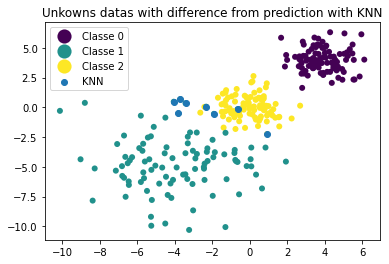

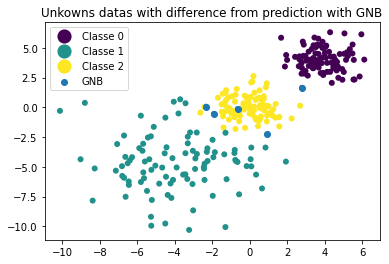

In [ ]:
#comp_knn_by(1, trainData, classe_origine, testData, testClasse)
#comp_knn_by(3, trainData, classe_origine, testData, testClasse)
#comp_knn_by(5, trainData, classe_origine, testData, testClasse)
comp_knn_by(7, trainData, classe_origine, testData, testClasse)
#comp_knn_by(13, trainData, classe_origine, testData, testClasse)
#comp_knn_by(15, trainData, classe_origine, testData, testClasse)

2.2 test p1_grand

In [ ]:
# grand 
excelGrand1 = pd.read_excel('./p1_grand.xlsx', sheet_name='Ensemble Apprentissage')
tmp = excelGrand1.to_numpy()
dataLinearGrand = np.flipud(np.rot90(np.array([tmp[0][1:],tmp[1][1:]])))

classeOrigineGrand = np.zeros(450, dtype=int)
classeOrigineGrand[150:300] += 1
classeOrigineGrand[300:450] += 2

print(tmp.shape)

excelGrand2 = pd.read_excel('./p1_grand.xlsx', sheet_name='Inconnu')
inconnuGrand = excelGrand2.to_numpy()

oracleGrand = np.array(inconnuGrand[2][1:], dtype=int)
inconnuGrand = np.flipud(np.rot90(np.array([inconnuGrand[0][1:],inconnuGrand[1][1:]])))

comp_knn_by(1, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)
comp_knn_by(3, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)
comp_knn_by(5, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)
comp_knn_by(7, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)
comp_knn_by(13, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)
comp_knn_by(15, dataLinearGrand, classeOrigineGrand, inconnuGrand, oracleGrand)

(2, 451)
Pour k =  1  : accuracy de Knn =  0.98  accuracy de dp =  0.9866666666666667
Pour k =  3  : accuracy de Knn =  0.9833333333333333  accuracy de dp =  0.9866666666666667
Pour k =  5  : accuracy de Knn =  0.9866666666666667  accuracy de dp =  0.9866666666666667
Pour k =  7  : accuracy de Knn =  0.99  accuracy de dp =  0.9866666666666667
Pour k =  13  : accuracy de Knn =  0.9833333333333333  accuracy de dp =  0.9866666666666667
Pour k =  15  : accuracy de Knn =  0.9866666666666667  accuracy de dp =  0.9866666666666667


2.3 test 

In [ ]:
excelKmean1 = pd.read_excel('./p1_Kmean.xlsx', sheet_name='Ensemble Apprentissage')
tmp = excelKmean1.to_numpy()
classeOrigineKmean = np.array(tmp[2][1:], dtype='float')
tmp = np.array([tmp[0][1:],tmp[1][1:]], dtype='float')
dataLinearKmean = np.flipud(np.rot90(tmp))

print(tmp.shape)

excelKmean2 = pd.read_excel('./p1_Kmean.xlsx', sheet_name='Inconnu')
inconnuKmean = excelKmean2.to_numpy()

oracleKmean = np.array(inconnuKmean[2][1:], dtype='float')
inconnuKmean = np.flipud(np.rot90(np.array([inconnuKmean[0][1:],inconnuKmean[1][1:]], dtype='float')))

comp_knn_by(1, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(3, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(5, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(7, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(13, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(15, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)

(2, 150)
Pour k =  1  : accuracy de Knn =  0.9333333333333333  accuracy de dp =  0.95
Pour k =  3  : accuracy de Knn =  0.94  accuracy de dp =  0.95
Pour k =  5  : accuracy de Knn =  0.95  accuracy de dp =  0.95
Pour k =  7  : accuracy de Knn =  0.95  accuracy de dp =  0.95
Pour k =  13  : accuracy de Knn =  0.9466666666666667  accuracy de dp =  0.95
Pour k =  15  : accuracy de Knn =  0.9433333333333334  accuracy de dp =  0.95


2.4 Distribution gaussienne

In [ ]:
excelKmean1 = pd.read_excel('./p1_NonGaussien.xlsx', sheet_name='Ensemble Apprentissage')
tmp = excelKmean1.to_numpy()
classeOrigineKmean = np.array(tmp[2][1:], dtype='float')
tmp = np.array([tmp[0][1:],tmp[1][1:]], dtype='float')
dataLinearKmean = np.flipud(np.rot90(tmp))

print(tmp.shape)

excelKmean2 = pd.read_excel('./p1_NonGaussien.xlsx', sheet_name='Inconnu')
inconnuKmean = excelKmean2.to_numpy()

oracleKmean = np.array(inconnuKmean[2][1:], dtype='float')
inconnuKmean = np.flipud(np.rot90(np.array([inconnuKmean[0][1:],inconnuKmean[1][1:]], dtype='float')))

comp_knn_by(1, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(3, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(5, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(7, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(13, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)
comp_knn_by(15, dataLinearKmean, classeOrigineKmean, inconnuKmean, oracleKmean)

(2, 210)
Pour k =  1  : accuracy de Knn =  0.9833333333333333  accuracy de dp =  0.98
Pour k =  3  : accuracy de Knn =  0.9833333333333333  accuracy de dp =  0.98
Pour k =  5  : accuracy de Knn =  0.9833333333333333  accuracy de dp =  0.98
Pour k =  7  : accuracy de Knn =  0.99  accuracy de dp =  0.98
Pour k =  13  : accuracy de Knn =  0.97  accuracy de dp =  0.98
Pour k =  15  : accuracy de Knn =  0.98  accuracy de dp =  0.98


Partie 3. Approche basée Descripteurs

Importation des mesures, création du vecteurs, extraction des inconnues, nous décrétons que les classe sont dans l'ordre décris dans le pdf

In [ ]:
def wang(measure_name):
  print("Preparing datas with the measure : ", measure_name)
  #import one of the 5 measures
  if measure_name == 'PHOG':
    measure = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesPHOG',index_col=0,header=None)
  elif measure_name == 'JCD':
    measure = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesJCD',index_col=0, header=None)
  elif measure_name == 'CEDD':
    measure = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesCEDD',index_col=0, header=None)
  elif measure_name == 'FCTH':
    measure = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesFCTH',index_col=0, header=None)
  elif measure_name == 'FCH':
    measure = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesFuzzyColorHistogr',index_col=0, header=None)

  #set up vector of name, label for the images
  print("Set up X and Y and return them")
  X = []
  y = []
  
  for j,measure_name in enumerate(measure.index):
    #get the name of the image thanks to the id of the column which is the name of the image
    index = int( os.path.splitext(measure_name)[0])
    if index < 100:
      X.append(measure.iloc[j].to_numpy())
      y.append(0)
    elif index < 200:
      X.append(measure.iloc[j].to_numpy())
      y.append(1)
    elif index < 300:
      X.append(measure.iloc[j].to_numpy())
      y.append(2)
    elif index < 400:
      X.append(measure.iloc[j].to_numpy())
      y.append(3)
    elif index < 500:
      X.append(measure.iloc[j].to_numpy())
      y.append(4)
    elif index < 600:
      X.append(measure.iloc[j].to_numpy())
      y.append(5)
    elif index < 700:
      X.append(measure.iloc[j].to_numpy())
      y.append(6)
    elif index < 800:
      X.append(measure.iloc[j].to_numpy())
      y.append(7)
    elif index < 900:
      X.append(measure.iloc[j].to_numpy())
      y.append(8)
    elif index < 1000:
      X.append(measure.iloc[j].to_numpy())
      y.append(9)
  
  return train_test_split(np.array(X), np.array(y, dtype=int), test_size=0.2, random_state=1, stratify=y)

Entrainement du modèle avec 20% en testing et 80% en training

In [ ]:
def KNNGNB(X_train, X_test, Y_train, k):
  #Test the 2 techniques
  print("Start kppv")
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  predictionsKnn = knn.predict(X_test)

  print("Start gaussian")
  model = GaussianNB()
  model.fit(X_train, Y_train)
  predictionsGNB = model.predict(X_test)

  return predictionsKnn, predictionsGNB

In [ ]:
#X = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesPHOG',index_col=0,header=None)
#Mesure = X.values

X = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesJCD',index_col=0,header=None)
Mesure = X.values
#Data = X.values
#Mesure = np.concatenate((Mesure,Data),axis=1)

X = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesCEDD',index_col=0,header=None)
Data = X.values
Mesure = np.concatenate((Mesure,Data),axis=1)

X = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesFCTH',index_col=0,header=None)
Data = X.values
Mesure = np.concatenate((Mesure,Data),axis=1)

X = pd.read_excel('WangSignatures.xlsx', sheet_name='WangSignaturesFuzzyColorHistogr',index_col=0,header=None)
Data = X.values
Mesure = np.concatenate((Mesure,Data),axis=1)
print(Mesure.shape)

#ALL MEASURE
y = []
for j,measure_name in enumerate(X.index):
    #get the name of the image thanks to the id of the column which is the name of the image
    index = int( os.path.splitext(measure_name)[0])
    if index < 100:
      y.append(0)
    elif index < 200:
      y.append(1)
    elif index < 300:
      y.append(2)
    elif index < 400:
      y.append(3)
    elif index < 500:
      y.append(4)
    elif index < 600:
      y.append(5)
    elif index < 700:
      y.append(6)
    elif index < 800:
      y.append(7)
    elif index < 900:
      y.append(8)
    elif index < 1000:
      y.append(9)
X_train, X_test, Y_train, Y_test = train_test_split(Mesure, np.array(y, dtype=int), test_size=0.2, random_state=1, stratify=y)

(1000, 629)



Start CEDD
Preparing datas with the measure :  CEDD
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.88
Accuracy avec gnb : 0.57
Bayes : 0.43000000000000005


/content/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/content/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/content/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


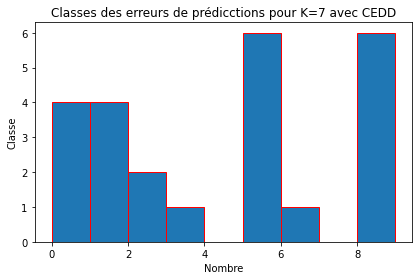

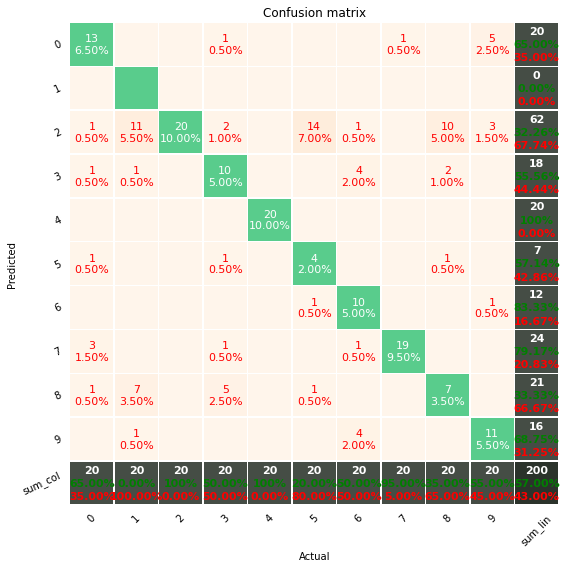

Knn : 0.12


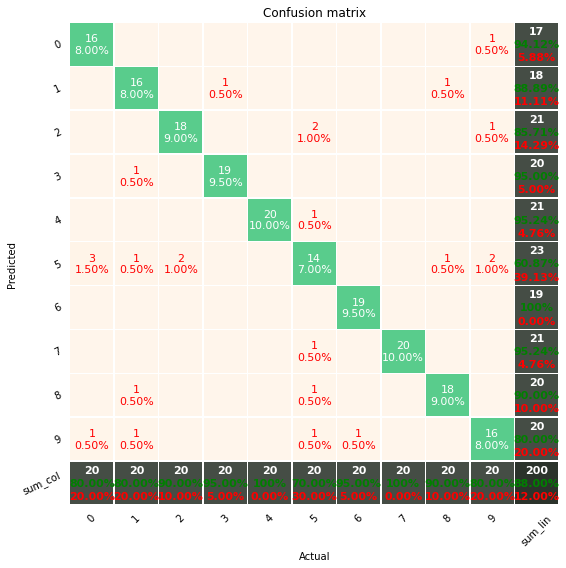

In [ ]:
print("\nStart CEDD")
X_train, X_test, Y_train, Y_test = wang('CEDD')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 7)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

def get_classesErrors(predictionsKnn, predictionsgnb, Y_test):
  errorsKNN, errorsGNB = [], []
  for i in range(len(Y_test)):
    if predictionsKnn[i] != Y_test[i]:
      errorsKNN.append(Y_test[i])
    if predictionsgnb[i] != Y_test[i]:
      errorsGNB.append(Y_test[i])
  return errorsKNN, errorsGNB

errorsKNN, errorsGNB = get_classesErrors(predictionsKnn, predictionsgnb, Y_test)
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(errorsKNN, edgecolor="red", bins=np.arange(10))
plt.title("Classes des erreurs de prédicctions pour K=7 avec CEDD")
plt.xlabel("Nombre")
plt.ylabel("Classe")

#show confusion matrix
conf_bayes = confusion_matrix(Y_test, predictionsgnb)
conf_knn = confusion_matrix(Y_test, predictionsKnn)
Pe_bayes = (1-np.trace(conf_bayes)/len(Y_test))
Pe_knn = (1-np.trace(conf_knn)/len(Y_test))

print("Bayes :", Pe_bayes)
df_cm_b = pd.DataFrame(conf_bayes, index=np.arange(10), columns=np.arange(10))
pp_matrix(df_cm_b)
print("Knn :", Pe_knn)
df_cm_k = pd.DataFrame(conf_knn, index=np.arange(10), columns=np.arange(10))
pp_matrix(df_cm_k)

In [ ]:
print("\nStart CEDD")
X_train, X_test, Y_train, Y_test = wang('JCD')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 15)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

errorsKNN, errorsGNB = get_classesErrors(predictionsKnn, predictionsgnb, Y_test)
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)



Start CEDD


NameError: ignored


Start CEDD
Preparing datas with the measure :  FCTH
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.795
Accuracy avec gnb : 0.55


(array([ 4.,  5.,  2.,  7.,  0., 10.,  1.,  0., 12.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

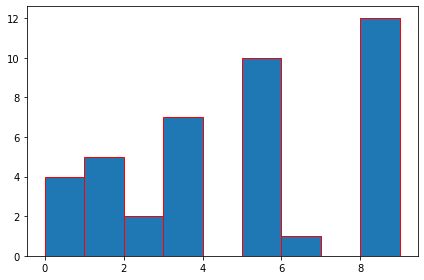

In [ ]:
print("\nStart CEDD")
X_train, X_test, Y_train, Y_test = wang('FCTH')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 15)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

errorsKNN, errorsGNB = get_classesErrors(predictionsKnn, predictionsgnb, Y_test)
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(errorsKNN, edgecolor="red", bins=np.arange(10))


Start CEDD
Preparing datas with the measure :  FCH
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.675
Accuracy avec gnb : 0.54


(array([ 6.,  8., 15.,  9.,  0.,  5.,  3.,  1., 18.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

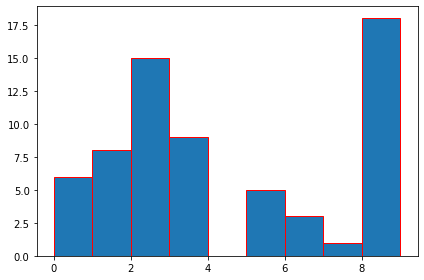

In [ ]:
print("\nStart CEDD")
X_train, X_test, Y_train, Y_test = wang('FCH')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 15)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

errorsKNN, errorsGNB = get_classesErrors(predictionsKnn, predictionsgnb, Y_test)
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(errorsKNN, edgecolor="red", bins=np.arange(10))

In [ ]:
#PHOG
print("\nStart PHOG")
X_train, X_test, Y_train, Y_test = wang('PHOG')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 3)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

#show confusion matrix
#conf_bayes = confusion_matrix(Y_test, predictionsgnb)
#conf_knn = confusion_matrix(Y_test, predictionsKnn)
#Pe_bayes = (1-np.trace(conf_bayes)/len(Y_test))
#Pe_knn = (1-np.trace(conf_knn)/len(Y_test))

#print("Bayes :", Pe_bayes)
#print(conf_bayes)
#print("Knn :", Pe_knn)
#print("conf_knn")

#JCD
print("\nStart JCD")
X_train, X_test, Y_train, Y_test = wang('JCD')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 15)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

#CEDD
print("\nStart CEDD")
X_train, X_test, Y_train, Y_test = wang('CEDD')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 3)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

#FCTH
print("\nStart FCTH")
X_train, X_test, Y_train, Y_test = wang('FCTH')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 3)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))

#FCH
print("\nStart FCH")
X_train, X_test, Y_train, Y_test = wang('FCH')
predictionsKnn, predictionsgnb = KNNGNB(X_train, X_test, Y_train, 3)
print("Accuracy avec knn :", accuracy_score(predictionsKnn, Y_test))
print("Accuracy avec gnb :", accuracy_score(predictionsgnb, Y_test))



Start PHOG
Preparing datas with the measure :  PHOG
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.525
Accuracy avec gnb : 0.555

Start JCD
Preparing datas with the measure :  JCD
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.88
Accuracy avec gnb : 0.585

Start CEDD
Preparing datas with the measure :  CEDD
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.83
Accuracy avec gnb : 0.57

Start FCTH
Preparing datas with the measure :  FCTH
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.79
Accuracy avec gnb : 0.55

Start FCH
Preparing datas with the measure :  FCH
Set up X and Y and return them
Start kppv
Start gaussian
Accuracy avec knn : 0.7
Accuracy avec gnb : 0.54
